# Data Set: Building Energy Efficienc

In [5]:
import os
import h2o
h2o.init()

#If next line fails, instead set path to datasets location.
fname = os.path.join("datasets/ENB2012_data.csv")
data = h2o.import_file(fname)

factorsList = ["X6", "X8"]
data[factorsList] = data[factorsList].asfactor()

train, test = data.split_frame([0.8])

x = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]
y = "Y2"  #Or "Y1"

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 33 mins
H2O cluster timezone:,Asia/Bangkok
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_Protech_ji3100
H2O cluster total nodes:,1
H2O cluster free memory:,1.497 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
train.describe()

Rows:614
Cols:10




,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
type,real,real,real,real,real,enum,real,enum,real,real
mins,0.62,514.5,245.0,110.25,3.5,,0.0,,6.01,10.9
mean,0.7636807817589577,671.914495114007,318.2605863192181,176.8269543973942,5.250000000000001,,0.23070032573289895,,22.185960912052142,24.4808306188925
maxs,0.98,808.5,416.5,220.5,7.0,,0.4,,43.1,47.01
sigma,0.10468379664950024,87.50658107149053,43.01897047655657,44.931514886814334,1.7514268245338074,,0.1324804079820034,,10.072906287743718,9.485743013392497
zeros,0,0,0,0,0,,39,,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
1,0.9,563.5,318.5,122.5,7.0,2,0.0,0,20.84,28.28
2,0.9,563.5,318.5,122.5,7.0,3,0.0,0,21.46,25.38


In [7]:
train.cor().round(2)

X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
1,-0.99,-0.2,-0.87,0.83,nan,0.01,nan,0.63,0.65
-0.99,1,0.19,0.88,-0.86,nan,-0.01,nan,-0.67,-0.68
-0.2,0.19,1,-0.29,0.28,nan,-0,nan,0.45,0.42
-0.87,0.88,-0.29,1,-0.97,nan,-0.01,nan,-0.87,-0.87
0.83,-0.86,0.28,-0.97,1,nan,0.01,nan,0.89,0.9
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.01,-0.01,-0,-0.01,0.01,nan,1,nan,0.27,0.21
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.63,-0.67,0.45,-0.87,0.89,nan,0.27,nan,1,0.98
0.65,-0.68,0.42,-0.87,0.9,nan,0.21,nan,0.98,1


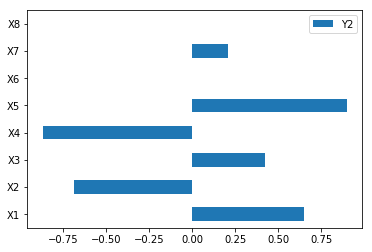

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

res = train[x].cor(train[y]).as_data_frame()
res.index = x
res.plot.barh()
plt.show()

# Data Set: Handwritten Digits

In [ ]:
import os
import h2o
h2o.init(max_mem_size="3G")

train60K = h2o.import_file(os.path.join("datasets/mnist.train.csv.gz"))
test = h2o.import_file(os.path.join("datasets/mnist.test.csv.gz"))

x = range(0,784)
y = 784

train60K[[y]] = train60K[[y]].asfactor()
test[[y]] = test[[y]].asfactor()

valid, train = train60K.split_frame([1.0/6.0])

In [ ]:
train60K.group_by(y).count().frame

In [ ]:
avg = train60K.group_by(y).mean()
avg_pixels = avg.frame[:, 1:785].as_data_frame()
sorted_columns = sorted(avg_pixels.columns, key=lambda x: int(x[6:]))
avg_pixels = avg_pixels.reindex_axis(sorted_columns, axis=1)

In [ ]:
avg_pixels

In [ ]:
train = h2o.import_file(os.path.join("datasets/mnist.enhanced_train.csv.gz"))
valid = h2o.import_file(os.path.join("datasets/mnist.enhanced_valid.csv.gz"))
test = h2o.import_file( os.path.join("datasets/mnist.enhanced_test.csv.gz") )

x = range(0,896)
y = 897

train[[y]] = train[[y]].asfactor()
valid[[y]] = valid[[y]].asfactor()
test[[y]] = test[[y]].asfactor()

# Data Set: Football Scores

In [31]:
import h2o
h2o.init()

data = h2o.import_file("datasets/england/2013-2014/")
betsH = data[ [i for i in range(23, 45, 3)] + [48, 49] ]  #Columns 23, 26, 29, 32, 35, 38, 41, 44, 48, 49
betsD = data[ [i for i in range(24, 46, 3)] + [50, 51] ]
betsA = data[ [i for i in range(25, 47, 3)] + [52, 53] ]
abets = data[ [i for i in range(55, 59)] + [i for i in range(60, 65)] ]
stats = data[ [i for i in range(4, 10)] + [i for i in range(11, 23)] ]
stats[ ["FTR","HTR"] ] = stats[ ["FTR","HTR"] ].asnumeric()  #Un-categorize these two columns

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 49 mins
H2O cluster timezone:,Asia/Bangkok
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_Protech_ji3100
H2O cluster total nodes:,1
H2O cluster free memory:,1.517 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


Parse progress: |█████████████████████████████████████████████████████████| 100%


C:\Users\Protech\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  import sys


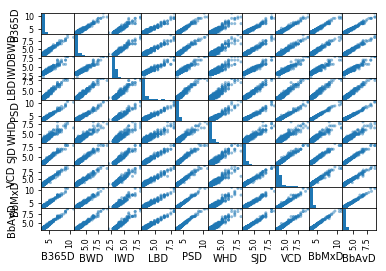

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
data = h2o.import_file("datasets/england/2013-2014/")
betsD = data[[i for i in range(24, 46, 3)] + [50, 51]]

d = betsD.as_data_frame()
pd.tools.plotting.scatter_matrix(d)
plt.show()

In [35]:
import h2o
h2o.init(max_mem_size="3G")

train = h2o.import_file( os.path.join("datasets/football.train.csv") )
valid = h2o.import_file( os.path.join("datasets/football.valid.csv") )
test = h2o.import_file( os.path.join("datasets/football.test.csv") )

train["HomeWin"] = (train["FTR"] == "H").asfactor()
valid["HomeWin"] = (valid["FTR"] == "H").asfactor()
test["HomeWin"] = (test["FTR"] == "H").asfactor()

train["ScoreDraw"] = (
  (train["FTHG"] > 0) & (train["FTHG"] == train["FTAG"])
  ).asfactor()
valid["ScoreDraw"] = (
  (valid["FTHG"] > 0) & (valid["FTHG"] == valid["FTAG"])
  ).asfactor()
test["ScoreDraw"] = (
  (test["FTHG"] > 0) & (test["FTHG"] == test["FTAG"])
  ).asfactor()

statFields = [
  "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR",
  "HS", "AS", "HST", "AST", "HF", "AF",
  "HC", "AC", "HY", "AY", "HR", "AR",
  "HomeWin", "ScoreDraw"
  ]
ignoreFields = ["Date", "HomeTeam", "AwayTeam"] + statFields

x = [i for i in train.names if i not in ignoreFields]

xNoOdds = [
  "Div", "HS1", "AS1", "HST1", "AST1",
  "HF1", "AF1", "HC1", "AC1", "HY1", "AY1", "HR1", "AR1",
  "res1H", "res1A", "res5H", "res5A", "res20H", "res20A"
  ]

#y = "FTR"  #3-value multinomial
#y = "ScoreDraw"  #Unbalanced binomial
y = "HomeWin" #Balanced binomial

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 hours 1 min
H2O cluster timezone:,Asia/Bangkok
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_Protech_ji3100
H2O cluster total nodes:,1
H2O cluster free memory:,1.510 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
